- Iris classification KNN

In [1]:
#importation des packages
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importation de package machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

In [3]:
# importationdu dataset iris
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='species', ylabel='count'>

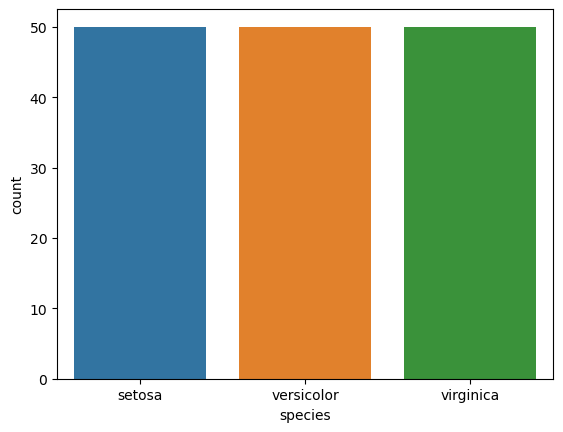

In [4]:
sns.countplot(x="species", data=data)

In [5]:
sns.scatterplot(x= "species", data=data)
#plt.xlabe("

<Axes: xlabel='species'>

Error in callback <function _draw_all_if_interactive at 0x000001C51AB86200> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 640x480 with 1 Axes>

In [6]:
# verification des colnne 
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
X= data[["sepal_length","sepal_width","petal_length","petal_width"]]
Y= data["species"]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [10]:
X_train,X_test, y_train, y_test =train_test_split(X,Y,test_size=0.4, random_state=100)

In [11]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
82,5.8,2.7,3.9,1.2
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
124,6.7,3.3,5.7,2.1
133,6.3,2.8,5.1,1.5
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [12]:
y_train

82     versicolor
22         setosa
139     virginica
124     virginica
133     virginica
          ...    
87     versicolor
103     virginica
67     versicolor
24         setosa
8          setosa
Name: species, Length: 90, dtype: object

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)


StandardScaler()

In [15]:
print(scaler.mean_)
print(scaler.var_)

[5.79222222 3.03777778 3.74888889 1.19      ]
[0.59916173 0.17790617 2.82072099 0.52512222]


In [16]:
X_train_norm= scaler.transform(X_train)
X_test_norm= scaler.transform(X_test)

In [17]:
column_list= X_train.columns
column_list

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [18]:
X_train_scaled = pd.DataFrame(data=X_train_norm, columns=column_list)
X_test_scaled = pd.DataFrame(data=X_test_norm, columns= column_list)

In [19]:
X_train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.010048,-0.800821,0.089974,0.013800
1,-1.540229,1.332946,-1.636730,-1.366171
2,1.431135,0.147520,0.983097,1.255773
3,1.172756,0.621690,1.161721,1.255773
4,0.655997,-0.563736,0.804472,0.427791


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


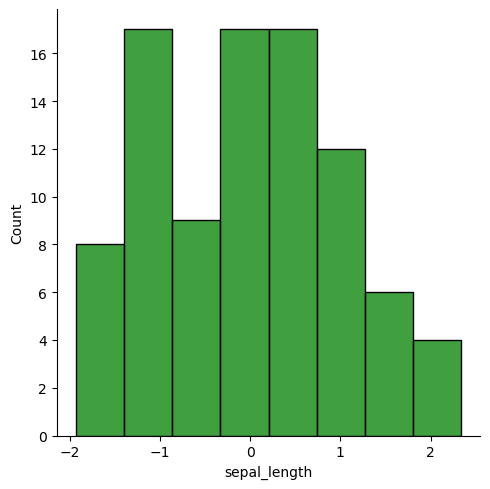

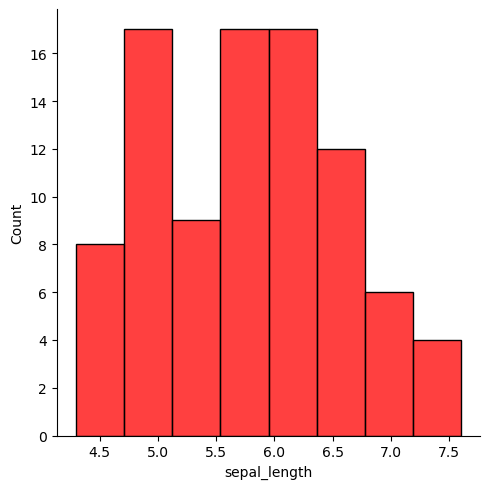

In [20]:
sns.displot(X_train_scaled["sepal_length"], color = "green")
sns.displot(X_train["sepal_length"], color = "red")

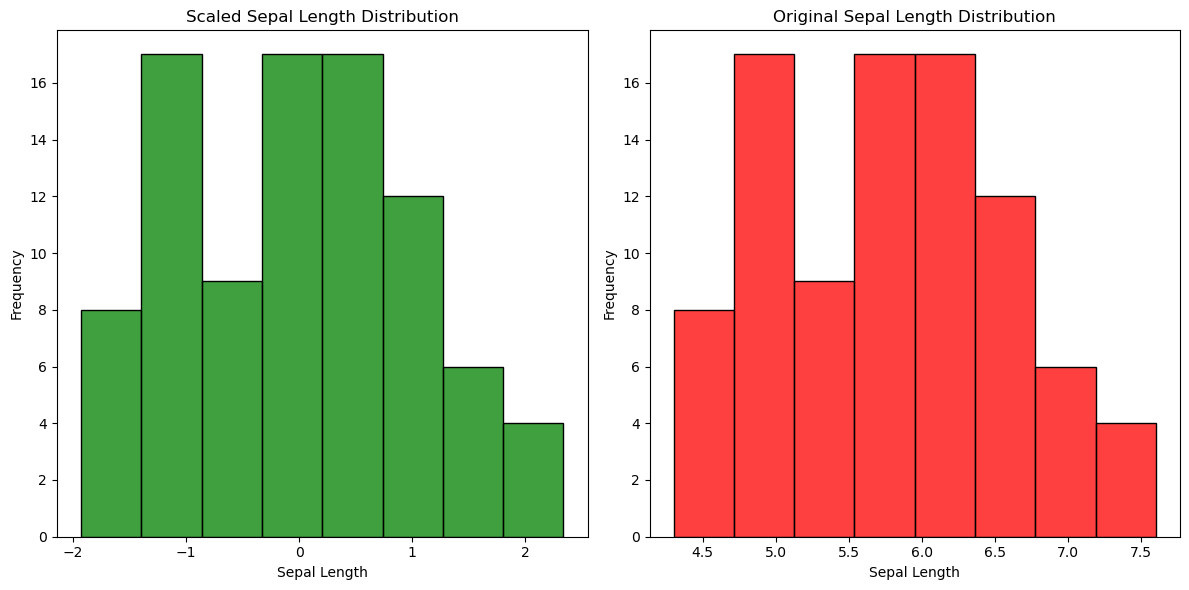

In [21]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the scaled sepal length distribution in green
sns.histplot(X_train_scaled["sepal_length"], color="green", ax=axs[0])
axs[0].set_title("Scaled Sepal Length Distribution")
axs[0].set_xlabel("Sepal Length")
axs[0].set_ylabel("Frequency")

# Plot the original sepal length distribution in red
sns.histplot(X_train["sepal_length"], color="red", ax=axs[1])
axs[1].set_title("Original Sepal Length Distribution")
axs[1].set_xlabel("Sepal Length")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [22]:
X_train_scaled.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,90.00,90.00,90.00,90.00
mean,0.00,0.00,0.00,-0.00
std,1.01,1.01,1.01,1.01
min,-1.93,-2.46,-1.64,-1.50
25%,-0.89,-0.56,-1.28,-1.23
50%,0.01,-0.09,0.36,0.15
75%,0.66,0.62,0.79,0.84
max,2.34,2.76,1.70,1.81


model KNeighbors classification

In [39]:
KNN= KNeighborsClassifier(n_neighbors=5)


In [40]:
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [41]:
y_pred =KNN.predict(X_test_scaled)

In [42]:
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.96      0.98        23

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

[[22  0  0]
 [ 0 15  0]
 [ 0  1 22]]


In [43]:
#macro avg : ne prend pas en compte de nombre cas pour chaque class
#weithed avg prend en compte chaque cas 

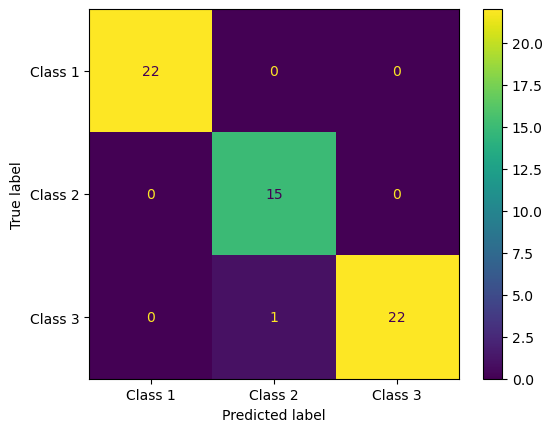

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Class 1", "Class 2", "Class 3"])
cm_display.plot()
plt.show()

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.9833333333333333

l'aire sous la courb roc

In [46]:
y_scores = KNN.predict_proba(X_test_scaled)
roc_auc_score(y_test,y_scores, multi_class ="ovr")

#dans multi_class on: ovr permet de prendre une class et comparé à d'autre class mais si ovo on compare chaque avec une autre

0.9977861919890905

In [47]:
#choisir le valeur de K apartir de methode ELBO
vect_error = []
for k in range(1,41):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_scaled, y_train)
    y_pred = KNN.predict(X_test_scaled)
    error = np.mean(y_pred !=y_test)
    vect_error.append(error)

In [48]:
# toutes les errer pour chaque valeur de K
print(vect_error)

[0.03333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.016666666666666666, 0.03333333333333333, 0.05, 0.05, 0.03333333333333333, 0.05, 0.03333333333333333, 0.05, 0.05, 0.05, 0.05, 0.05, 0.03333333333333333, 0.05, 0.06666666666666667, 0.05, 0.05, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.08333333333333333, 0.08333333333333333, 0.1, 0.1, 0.08333333333333333, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


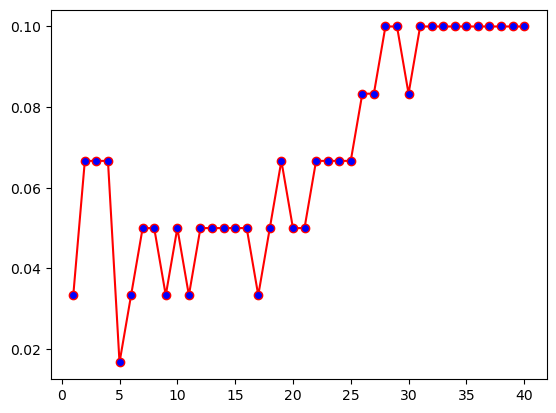

In [49]:
# graphique pour toutes les valeurs de K
plt.plot(range(1,41), vect_error, marker = "o", color = "red", markerfacecolor = "blue")

In [50]:
# le K ideal = 5

In [51]:
mininum = np.argmin(vect_error)
print(mininum)

4


- TRACER LA COUR ROC AVEC PLUSIESSIRS CLASS

In [52]:
X,y = make_classification(
    n_samples = 1000, #1000 observation
    n_features = 5, # carateristique total
    n_informative = 3,  # useful, feature
    n_classes = 3, #  on a étiquette 
    random_state = 999
)
    
print(np.shape(X))
print(np.shape(y))

(1000, 5)
(1000,)


In [53]:
print(y)

[2 0 0 2 1 2 1 0 0 1 2 1 0 2 1 0 2 1 2 2 2 1 2 0 2 0 1 0 2 2 1 1 1 2 0 1 1
 2 0 2 0 0 1 1 1 2 2 2 1 1 0 2 2 0 0 1 1 1 1 1 2 1 1 0 1 0 1 1 2 0 1 0 1 0
 0 1 2 1 0 2 2 2 2 1 1 2 0 0 2 1 1 0 2 0 2 1 0 0 2 0 0 2 0 0 1 1 0 1 2 1 1
 2 1 0 2 2 1 2 2 1 0 0 0 0 0 1 0 1 1 0 2 1 2 2 2 0 1 0 0 0 0 1 0 0 0 0 2 2
 2 2 0 1 0 0 1 0 1 1 0 2 2 1 1 1 2 0 0 1 2 1 2 2 2 0 0 0 1 2 0 2 0 2 0 0 2
 0 2 0 2 0 2 1 1 1 1 0 2 2 0 1 0 2 0 2 2 1 0 1 1 0 2 1 1 0 1 0 0 1 2 1 2 2
 2 0 2 2 0 0 1 1 2 2 1 1 0 0 0 1 0 1 1 0 0 1 2 1 2 1 2 0 0 2 1 0 0 1 1 0 2
 1 0 0 0 2 1 2 2 1 1 1 2 0 0 2 2 0 1 2 0 1 1 2 0 2 1 1 2 1 2 2 0 0 2 0 1 2
 0 1 0 0 2 2 1 1 1 2 1 1 1 1 0 0 1 0 2 2 1 2 0 2 2 1 0 0 1 0 1 2 1 0 1 0 2
 0 2 0 2 1 2 2 0 1 2 0 0 2 0 1 2 0 0 0 2 0 0 0 2 2 1 2 2 1 0 1 0 0 0 0 2 2
 2 1 2 2 0 1 2 1 2 1 1 0 2 1 0 1 2 0 2 0 1 0 2 2 0 2 0 0 0 1 0 1 2 2 2 1 1
 2 0 1 0 2 0 2 1 0 2 2 0 0 2 2 2 2 1 0 0 0 1 1 0 2 1 1 1 2 2 2 0 0 0 2 0 0
 0 0 0 0 2 0 0 2 0 2 0 2 0 1 0 2 1 1 1 1 2 1 0 1 2 2 2 0 2 0 2 0 0 0 0 1 0
 2 2 1 2 0 2 2 0 0 1 2 0 

In [54]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=101)

In [55]:
y_test

array([0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2,
       2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2,
       2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0,
       1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0,
       2, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0,
       1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0,

In [63]:

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [64]:
# les valeur de prdiction du model
y_pred = KNN.predict(X_test)
pred_proba = KNN.predict_proba(X_test)
pred_proba

array([[0.42857143, 0.28571429, 0.28571429],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       ...,
       [0.14285714, 0.        , 0.85714286],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ]])

In [65]:
y_test_binarized= label_binarize(y_test,classes =np.unique(y_test))
print(y_test_binarized)

[[1 0 0]
 [1 0 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 1 0]
 [0 1 0]]


In [66]:
classes = ["0","1","2"]

In [67]:
from sklearn.metrics import roc_curve, auc

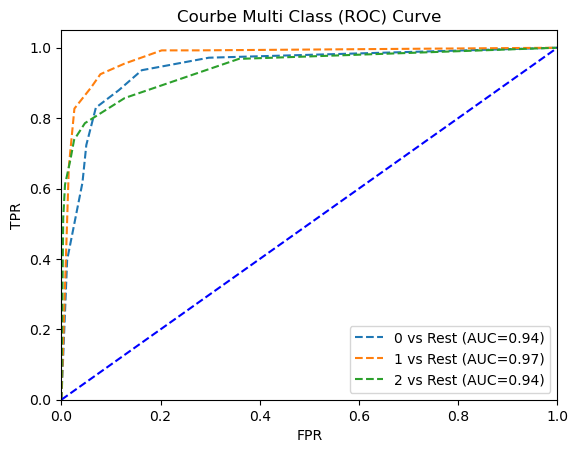

In [68]:
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()
n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_proba[:, i])  # Provide y_score here
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='--', label="%s vs Rest (AUC=%.2f)" % (classes[i], roc_auc[i]))



plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title("Courbe Multi Class (ROC) Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc ="lower right")
plt.show()


In [69]:
y_scores = KNN.predict_proba(X_test)
roc_auc_score(y_test,y_scores, multi_class = "ovr")

0.9512237433650267